# Optimización de regresión lineal con descenso de gradiente para calcular coeficientes (b0 y b1) mediante minimización de la suma de cuadrados

**Descripción:**

La regresión lineal busca modelar la relación entre una variable dependiente $ y $ y una o más variables independientes $ X $ mediante una función lineal. En el caso de la regresión lineal simple, con una única variable independiente, la relación se describe mediante la ecuación:

$y = b_0 + b_1 \cdot X$

donde $ b_0 $ es la ordenada al origen y $ b_1 $ es la pendiente de la línea de regresión.

El objetivo de la optimización de regresión lineal con descenso de gradiente es encontrar los valores óptimos de $ b_0 $ y $ b_1 $ que minimicen la función de pérdida. En este caso, la función de pérdida es la suma de los cuadrados de los residuos (SSR), definida como:

$ SSR(b_0, b_1) = \sum_{i=1}^{n} (y_i - (b_0 + b_1 \cdot X_i))^2 $

donde $ n $ es el número de observaciones en los datos, $ y_i $ es el valor verdadero de la variable dependiente para la i-ésima observación, y $ X_i $ es el valor de la variable independiente correspondiente.

El descenso de gradiente es un algoritmo de optimización que ajusta iterativamente los coeficientes del modelo en la dirección que reduce gradualmente la pérdida. Esto se logra utilizando el gradiente de la función de pérdida $ SSR(b_0, b_1) $ con respecto a los parámetros $ b_0 $ y $ b_1 $, denotado como $ \nabla SSR(b_0, b_1) $.

En cada iteración del descenso de gradiente, los parámetros se actualizan en la dirección opuesta al gradiente multiplicado por una tasa de aprendizaje $ \alpha $. Las actualizaciones de los parámetros se realizan de la siguiente manera:

$ b_0 = b_0 - \alpha \cdot \frac{\partial SSR(b_0, b_1)}{\partial b_0} $ 

$ b_1 = b_1 - \alpha \cdot \frac{\partial SSR(b_0, b_1)}{\partial b_1} $

Esto se repite hasta que se alcanza un criterio de convergencia o se completa un número fijo de iteraciones. (en este caso se utiliza un número de iteraciones límite)

Una vez finalizado, los valores finales de $ b_0 $ y $ b_1 $ representan los mejores estimados que minimizan la SSR y describen la mejor línea de regresión para los datos dados.

El siguiente código implementa la optimización de una regresión lineal utilizando el método del descenso de gradiente. Su objetivo es calcular los coeficientes $ b_0 $ y $ b_1 $ mediante la minimización de los cuadrados de los residuos.

El ejemplo y el método fueron tomados del video de Josh Stamer [Gradient Descent, Step-by-Step](https://www.youtube.com/watch?v=sDv4f4s2SB8&list=PLblh5JKOoLUIxGDQs4LFFD--41Vzf-ME1&index=4), que forma parte de su serie StatQuest. 


El código y las sugerencias han sido desarrollados por mi. 

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.linear_model import SGDRegressor

Resultados de la estimación de parámetros mediante el descenso de gradiente:
b0 = 0.949
b1 = 0.641



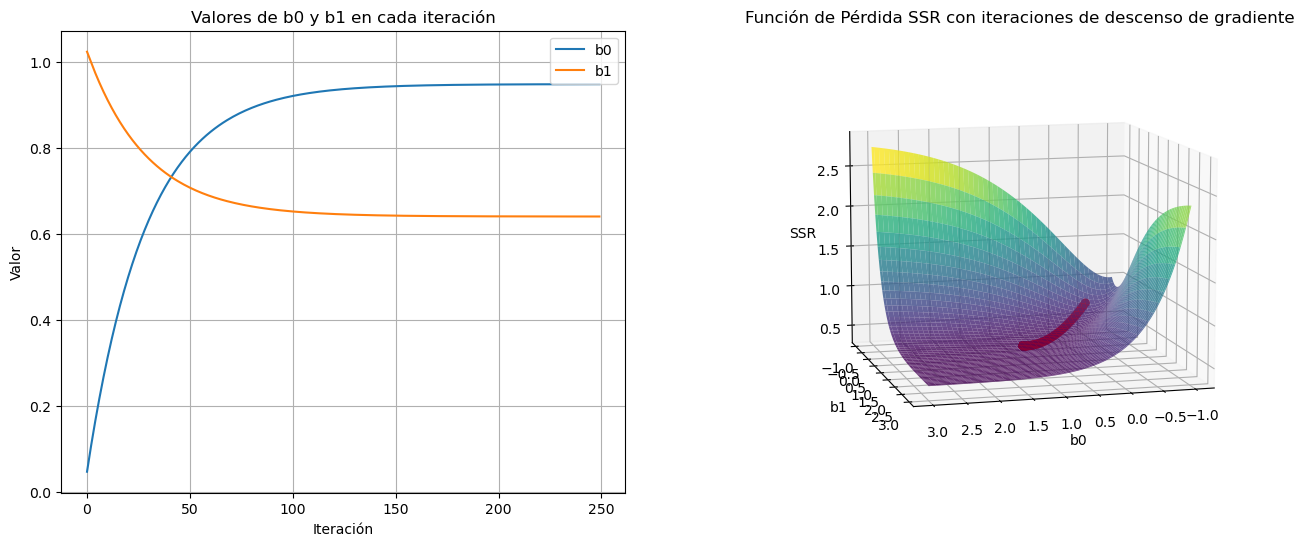

In [61]:
#Se inicia definiendo la función de perdida, así como sus derivadas: 

# Función de pérdida: Suma de los cuadrados de los residuos (SSR)
def ssr(y_true, y_pred):
    return ((y_true - y_pred) ** 2).sum()

# Derivada parcial de la función de pérdida con respecto a b0
def ssr_derivative_b0(y_true, y_pred):
    return -2 * (y_true - y_pred).sum()

# Derivada parcial de la función de pérdida con respecto a b1
def ssr_derivative_b1(y_true, y_pred, X):
    return -2 * (X * (y_true - y_pred)).sum()

# Definir los datos de entrada (features) y los valores verdaderos de y
X = np.array([0.5, 2.3, 2.9])
y_true = np.array([1.4, 1.9, 3.2])

# Inicializar los parámetros del modelo
b0 = 0  # Ordenada al origen inicial
b1 = 1  # Pendiente inicial

# Tasa de aprendizaje (tamaño de paso)
alpha = 0.03

# Número de iteraciones
num_iteraciones = 250

# Listas para almacenar los valores de b0 y b1 en cada iteración
valores_b0 = []
valores_b1 = []

# Iteraciones del descenso de gradiente
for i in range(num_iteraciones):
    # Calcular las predicciones del modelo
    y_pred = b0 + b1 * X
    
    # Actualizar los parámetros del modelo utilizando el descenso de gradiente
    b0 = b0 - alpha * ssr_derivative_b0(y_true, y_pred)
    b1 = b1 - alpha * ssr_derivative_b1(y_true, y_pred, X)
    
    # Almacenar los valores de b0 y b1
    valores_b0.append(b0)
    valores_b1.append(b1)  

# Imprimir los valores finales de los parámetros del modelo
print('============================================================================')
print("Resultados de la estimación de parámetros mediante el descenso de gradiente:")
print('============================================================================')
print(f"b0 = {b0:.3}")
print(f"b1 = {b1:.3}")
print('============================================================================\n')

# Graficar la función de pérdida SSR
fig = plt.figure(figsize=(16, 6))

# Primera subfigura: Graficar los valores de b0 y b1 durante las iteraciones
ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(valores_b0, label='b0')
ax1.plot(valores_b1, label='b1')
ax1.set_xlabel('Iteración')
ax1.set_ylabel('Valor')
ax1.set_title('Valores de b0 y b1 en cada iteración')
ax1.legend()
ax1.grid(True)

# Segunda subfigura: Graficar la función de pérdida SSR en 3D con puntos de iteraciones
ax2 = fig.add_subplot(1, 2, 2, projection='3d')
b0_mesh, b1_mesh = np.meshgrid(np.linspace(-1, 3, 100), np.linspace(-1, 3, 100))
loss_mesh = np.zeros_like(b0_mesh)

for i in range(len(b0_mesh)):
    for j in range(len(b0_mesh[0])):
        loss_mesh[i, j] = ssr(y_true, valores_b0[i] + valores_b1[j] * X)

ax2.plot_surface(b0_mesh, b1_mesh, loss_mesh, cmap='viridis', alpha=0.8)  # Superficie SSR
ax2.scatter(valores_b0, valores_b1, np.array([ssr(y_true, b0 + b1 * X) for b0, b1 in zip(valores_b0, valores_b1)]), color='red', s=30)  # Puntos de iteraciones
ax2.set_xlabel('b0')
ax2.set_ylabel('b1')
ax2.set_zlabel('SSR')
ax2.set_title('Función de Pérdida SSR con iteraciones de descenso de gradiente')
ax2.view_init(elev=10, azim=75)

plt.show()


Gráfica 1: Esta visualización muestra cómo los valores de $ b_0 $ y $ b_1 $ convergen hacia valores específicos a medida que aumenta el número de iteraciones. La convergencia se evidencia cuando el cambio entre iteraciones se vuelve mínimo, alcanzando valores aproximados de 0.95 para $ b_0 $ y 0.64 para $ b_1 $.

Gráfica 2: En esta representación tridimensional, la superficie refleja la función de pérdida SSR en relación con los parámetros del modelo $ b_0 $ y $ b_1 $. Los puntos dispersos en esta superficie representan las diferentes iteraciones del algoritmo de descenso de gradiente, reflejando los valores específicos de $ b_0 $ y $ b_1 $ explorados durante el proceso. Se observa cómo el algoritmo se desplaza a lo largo de la superficie de la función de pérdida en búsqueda del mínimo global. A medida que avanza, los puntos tienden a agruparse de manera más compacta a medida que se acercan al mínimo, lo que demuestra la convergencia, como se ilustra en la primera gráfica.

Esta representación visual ejemplifica cómo, en cada iteración, el algoritmo calcula el gradiente de la función de pérdida en el punto actual y ajusta los parámetros del modelo en dirección opuesta al gradiente. Este proceso de actualización gradual hacia el mínimo de la función de pérdida se repite iterativamente hasta que se alcanza un punto donde el gradiente es casi cero o se alcanza el número máximo de iteraciones definido.

## Calculo de modelo utilizando scikit-learn

Ahora se implementará un modelo de regresión lineal utilizando la biblioteca 'scikit-learn' y el enfoque de descenso de gradiente no estocástico. A diferencia del enfoque estocástico típicamente utilizado por 'scikit-learn', donde los parámetros se actualizan después de cada punto de datos, aquí se elige utilizar el descenso de gradiente no estocástico. Al igual que se hizo en el ejemplo anterior. 

En el descenso de gradiente no estocástico, los parámetros se actualizan utilizando el gradiente de la función de pérdida calculada en todo el conjunto de datos en cada iteración. Esto permite que el algoritmo ajuste los parámetros considerando toda la información disponible en lugar de hacerlo punto por punto.

Se prefiere el descenso de gradiente no estocástico en este caso porque el conjunto de datos es lo suficientemente pequeño para caber en la memoria, lo que facilita una convergencia más estable y predecible del algoritmo.

El código utiliza el modelo `SGDRegressor` de 'scikit-learn', configurado con hiperparámetros específicos para el descenso de gradiente no estocástico. Luego, ajusta el modelo a los datos de entrada (`X`) y los valores verdaderos (`y_true`), utilizando valores iniciales predefinidos para los coeficientes del modelo. La ordenada al origen (`b0_init`) se establece en 0 y la pendiente (`b1_init`) se establece en 1. 

In [68]:
# Definir los datos de entrada (features) y los valores verdaderos de y
X = np.array([[0.5], [2.3], [2.9]])  # Convertir a matriz 2D
y_true = np.array([1.4, 1.9, 3.2])

# Valores iniciales de los coeficientes
b0_init = 0  # Ordenada al origen inicial
b1_init = 1  # Pendiente inicial

# Inicializar el modelo SGDRegressor con hiperparámetros originales
model = SGDRegressor(loss='squared_error', alpha=0.03, max_iter=1000, penalty=None, tol=None, learning_rate='constant',eta0=0.01)

# Ajustar el modelo a los datos especificando los valores iniciales de los coeficientes
model.fit(X, y_true, coef_init=[b1_init], intercept_init=b0_init)

# Imprimir los coeficientes estimados
print("Coeficiente b0:", model.intercept_)
print("Coeficiente b1:", model.coef_)


Coeficiente b0: [0.93978827]
Coeficiente b1: [0.64587833]


Aunque el modelo utilizado en el código es similar al codigo utilizado anteriormente para hacer el descenso de gradiente, su convergencia es más lenta en comparación. Esto podría ser indicativo de una necesidad de ajuste de hiperparámetros más preciso.
Sin embargo, realizar este ajuste implica un proceso extenso que ya se ha completado de manera satisfactoria con el código anterior.

Entonces, la próxima tarea es desarrollar una función que facilite la creación de un modelo de descenso de gradiente no estocástico, permitiendo la especificación de diferentes funciones de pérdida y valores de alpha para determinar el tamaño de cada paso. Este código requerirá que el usuario proporcione la función de pérdida deseada, así como sus derivadas. Esta implementación podría ser beneficiosa en situaciones donde se disponga de pocos datos o se desee utilizar una función de pérdida poco común.

Resultados de la estimación de parámetros mediante el descenso de gradiente:
b0 = 0.948
b1 = 0.641



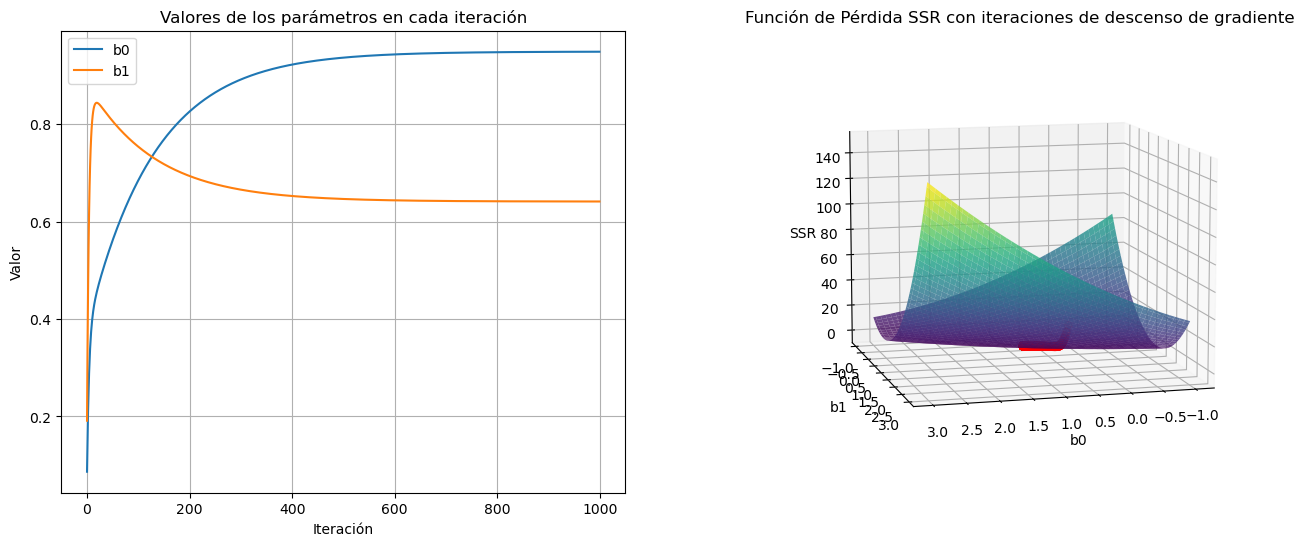

In [69]:
def gradient_descent(loss_function, loss_derivative_functions, X, y_true, alpha=0.01, num_iterations=1000):
    '''
    Implementa el algoritmo de descenso de gradiente para encontrar los parámetros óptimos de un modelo de regresión lineal, minimizando una función de pérdida dada.

    Parámetros:
    - loss_function: Función de pérdida que se utiliza para evaluar el error entre las predicciones del modelo y los valores verdaderos.
    - loss_derivative_functions: Lista de funciones que calculan las derivadas parciales de la función de pérdida con respecto a cada parámetro del modelo.
    - X: Matriz de características de entrada.
    - y_true: Vector de valores verdaderos.
    - alpha (opcional): Tasa de aprendizaje que controla el tamaño de los pasos en cada iteración del descenso de gradiente. Por defecto, se establece en 0.01.
    - num_iterations (opcional): Número de iteraciones del descenso de gradiente. Por defecto, se establece en 1000.

    Devuelve:
    - params: Una matriz numpy que contiene los valores finales de los parámetros del modelo.
    - valores_params: Una lista de listas que contiene los valores de los parámetros en cada iteración del descenso de gradiente.
    '''
    # Inicializar los parámetros del modelo
    num_params = len(loss_derivative_functions)
    params = np.zeros(num_params)
    
    # Número de observaciones
    n = len(y_true)
    
    # Listas para almacenar los valores de los parámetros en cada iteración
    valores_params = [[] for _ in range(num_params)]
    
    # Iteraciones del descenso de gradiente
    for _ in range(num_iterations):
        # Calcular las predicciones del modelo
        y_pred = np.dot(X, params)
        
        # Calcular los gradientes y actualizar los parámetros
        for i in range(num_params):
            gradient = loss_derivative_functions[i](y_true, y_pred, X[:, i])
            params[i] -= alpha * gradient / n
            valores_params[i].append(params[i])
        
    # Devolver los valores finales de los parámetros
    return params, valores_params

#Ejemplo de uso: 

# Función de pérdida SSR
def ssr_loss(y_true, y_pred):
    return ((y_true - y_pred) ** 2).sum()

# Derivada de la función de pérdida con respecto a los parámetros
def ssr_derivative(y_true, y_pred, X_i):
    return -2 * (y_true - y_pred) @ X_i

# Definir los datos de entrada (features) y los valores verdaderos de y
X = np.array([[1, 0.5], [1, 2.3], [1, 2.9]])  # Variable independiente, incluyendo un 1 para el término de intercepción (b0)
y_true = np.array([1.4, 1.9, 3.2])  # Variable dependiente

# Parámetros de configuración
alpha = 0.02
num_iteraciones = 1000

# Realizar la optimización de regresión lineal con descenso de gradiente
params, valores_params = gradient_descent(ssr_loss, [ssr_derivative] * X.shape[1], X, y_true, alpha, num_iteraciones)

# Imprimir los valores finales de los parámetros del modelo
print('============================================================================')
print("Resultados de la estimación de parámetros mediante el descenso de gradiente:")
print('============================================================================')
for i, param in enumerate(params):
    print(f"b{i} = {param:.3}")
print('============================================================================\n')

# Graficar la función de pérdida SSR en un espacio tridimensional
fig = plt.figure(figsize=(16, 6))

# Primera subfigura: Graficar los valores de los parámetros durante las iteraciones
ax1 = fig.add_subplot(1, 2, 1)
for i, valores_param in enumerate(valores_params):
    ax1.plot(valores_param, label=f'b{i}')
ax1.set_xlabel('Iteración')
ax1.set_ylabel('Valor')
ax1.set_title('Valores de los parámetros en cada iteración')
ax1.legend()
ax1.grid(True)

# Segunda subfigura: Graficar la función de pérdida SSR en 3D con puntos de iteraciones
ax2 = fig.add_subplot(1, 2, 2, projection='3d')
b0_mesh, b1_mesh = np.meshgrid(np.linspace(-1, 3, 100), np.linspace(-1, 3, 100))
loss_mesh = np.zeros_like(b0_mesh)

for i in range(len(b0_mesh)):
    for j in range(len(b0_mesh[0])):
        loss_mesh[i, j] = ssr_loss(y_true, b0_mesh[i, j] + b1_mesh[i, j] * X[:, 1])

ax2.plot_surface(b0_mesh, b1_mesh, loss_mesh, cmap='viridis', alpha=0.8)  # Superficie SSR

# Graficar todos los puntos de iteraciones
ax2.scatter(valores_params[0], valores_params[1], [ssr_loss(y_true, b0 + b1 * X[:, 1]) for b0, b1 in zip(valores_params[0], valores_params[1])], color='red', s=30)

ax2.set_xlabel('b0')
ax2.set_ylabel('b1')
ax2.set_zlabel('SSR')
ax2.set_title('Función de Pérdida SSR con iteraciones de descenso de gradiente')
ax2.view_init(elev=10, azim=75)

plt.show()


Con esta nueva función, que se utiliza mediante un descenso de gradiente para ajustar los parámetros del modelo, observamos una convergencia exitosa para predecir los valores de la ordenada al origen y la pendiente en este modelo simple de regresión lineal, utilizando una suma cuadrada de los residuos como función de pérdida. Se espera que esta función también sea efectiva con funciones más complejas o cuando la regresión lineal implica más de un parámetro.

## Bibliografía: 

Stamer, J. [StatQuest with Josh Starmer]. (2019, February 5). Gradient Descent, Step-by-Step [Video]. YouTube. https://www.youtube.com/watch?v=sDv4f4s2SB8&list=PLblh5JKOoLUIxGDQs4LFFD--41Vzf-ME1&index=5